Libraries imported successfully.
First few rows of the dataset:
  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  

Last few rows of the dataset:
    Undergrad Marital.Status  Taxable.Income  City.Population  \
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           

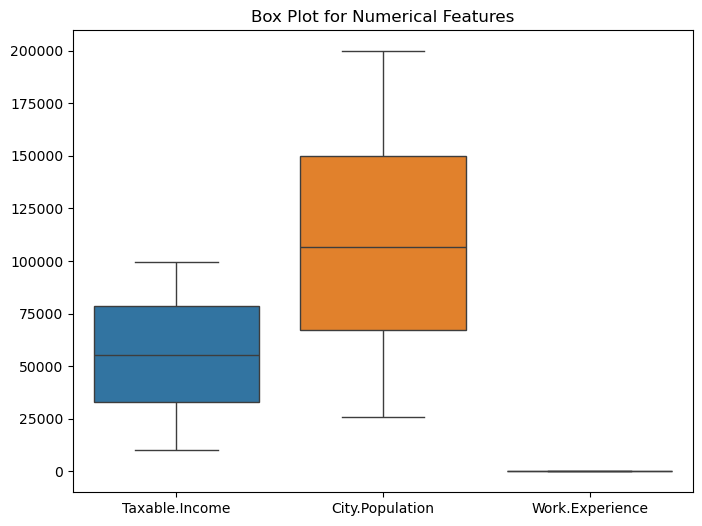


Summary Statistics:
       Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000


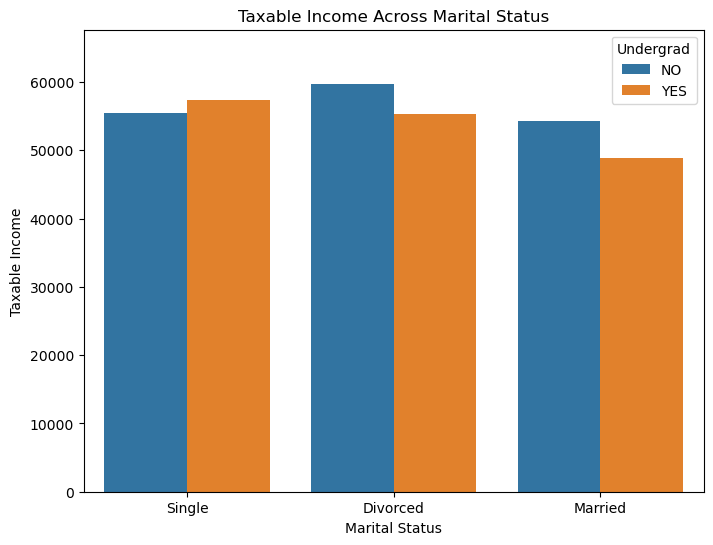

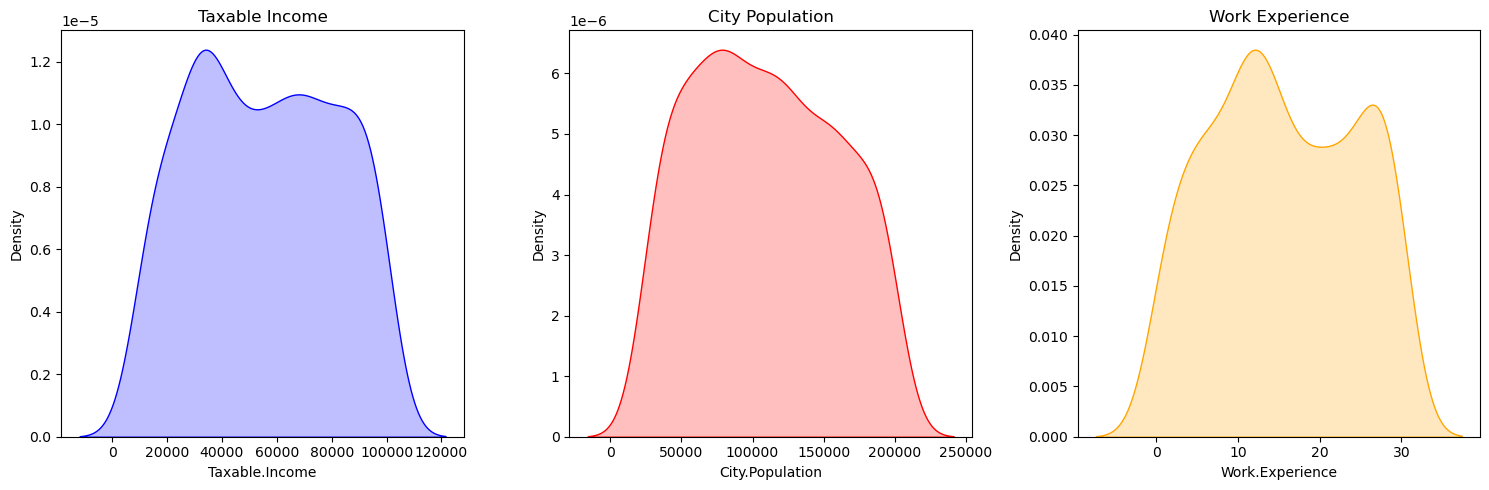

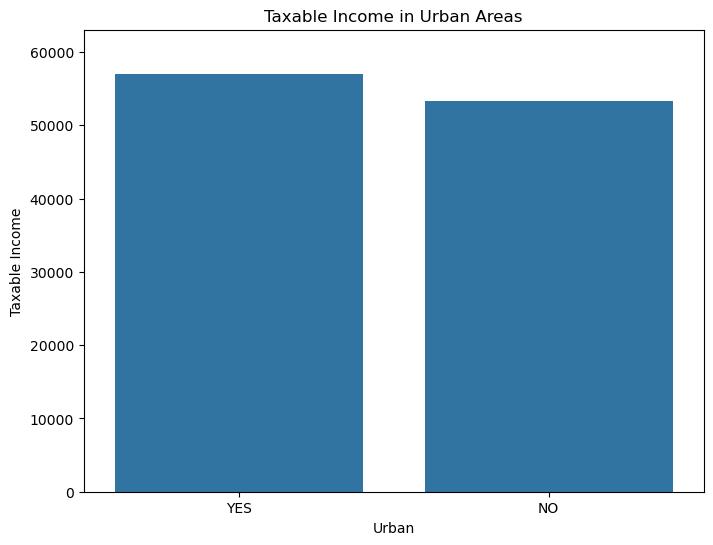


Training Data Shape:
(420, 4)

Testing Data Shape:
(180, 4)

Accuracy of the Random Forest model: 80.00%

Classification Report:
              precision    recall  f1-score   support

        Good       0.80      1.00      0.89       144
       Risky       0.00      0.00      0.00        36

    accuracy                           0.80       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.64      0.80      0.71       180



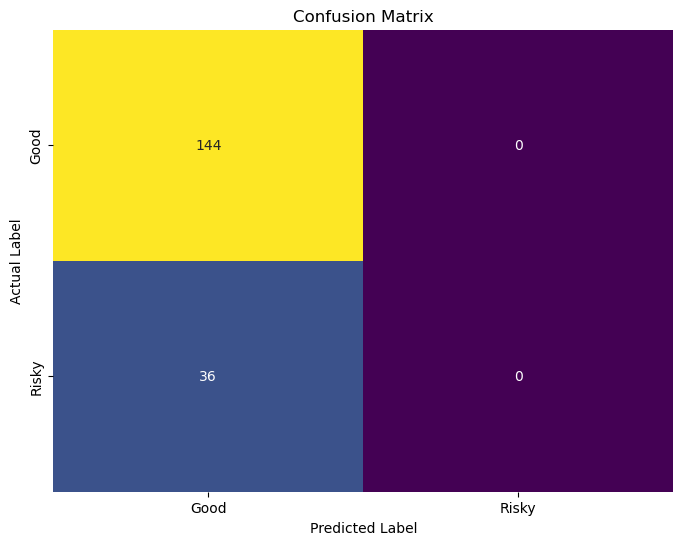

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

# Loading the dataset
data = pd.read_csv("G:/TOP-MENTOR/FILES/Sep 1st/Assignments/Random Forests_prj9 & 10/Fraud_check.csv")

# Display the first and last few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nLast few rows of the dataset:")
print(data.tail())

# Data Exploration
print("\nDataset Shape:")
print(data.shape)

print("\nDataset Information:")
print(data.info())

print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nChecking for duplicate values:")
print(data.duplicated().sum())

# Visualizing numerical data for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data[['Taxable.Income', 'City.Population', 'Work.Experience']])
plt.title('Box Plot for Numerical Features')
plt.savefig("Box_plot.jpg")
plt.show()

# Exploratory Data Analysis
print("\nSummary Statistics:")
print(data.describe())

# Taxable income across marital status segmented by graduation status
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Marital.Status', y='Taxable.Income', hue='Undergrad', dodge=True, errwidth=0)
plt.title("Taxable Income Across Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Taxable Income")
plt.savefig("Taxable_Income_across_Marital_Status.jpg")
plt.show()

# Kernel Density Plot for numerical features
plt.figure(figsize=(15, 5))

# Taxable Income
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x='Taxable.Income', fill=True, color='blue')
plt.title('Taxable Income')

# City Population
plt.subplot(1, 3, 2)
sns.kdeplot(data=data, x='City.Population', fill=True, color='red')
plt.title('City Population')

# Work Experience
plt.subplot(1, 3, 3)
sns.kdeplot(data=data, x='Work.Experience', fill=True, color='orange')
plt.title('Work Experience')

plt.tight_layout()
plt.savefig("KDE_plot.jpg")
plt.show()

# Taxable income in urban areas
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Urban', y='Taxable.Income', errwidth=0)
plt.title("Taxable Income in Urban Areas")
plt.xlabel("Urban")
plt.ylabel("Taxable Income")
plt.savefig("Taxable_Income_in_Urban_Areas.jpg")
plt.show()

# Data Preparation for Machine Learning
# Encoding categorical variables
X = data[['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban']]
X['Undergrad'] = X['Undergrad'].map({'NO': 0, 'YES': 1})
X['Urban'] = X['Urban'].map({'NO': 0, 'YES': 1})
X['Marital.Status'] = X['Marital.Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

# Categorizing the target variable (Taxable Income)
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
y = data['Taxable.Income']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

# Display the shape of training and testing data
print("\nTraining Data Shape:")
print(X_train.shape)
print("\nTesting Data Shape:")
print(X_test.shape)

# Label encoding the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Building and training the Random Forest model
rf = RandomForestClassifier(n_estimators=500, max_depth=4, random_state=2, criterion='gini', min_samples_split=4, min_samples_leaf=3)
rf.fit(X_train, y_train_encoded)

# Predicting on the test data
rf_pred = rf.predict(X_test)

# Evaluating the model
rf_accuracy = accuracy_score(y_test_encoded, rf_pred) * 100
print(f'\nAccuracy of the Random Forest model: {rf_accuracy:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test_encoded, rf_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
